#Desafío 1 : hora de la práctica

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos: churn.csv

1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

In [50]:
import pandas as pd

In [51]:
datos = pd.read_csv('churn.csv')

In [52]:
datos.head()

id_cliente  score_credito     pais sexo_biologico  edad  años_de_cliente  \
0    15634602            619  Francia          Mujer    42                2   
1    15647311            608   España          Mujer    41                1   
2    15619304            502  Francia          Mujer    42                8   
3    15701354            699  Francia          Mujer    39                1   
4    15737888            850   España          Mujer    43                2   

       saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0       0.00                     1                      1               1   
1   83807.86                     1                      0               1   
2  159660.80                     3                      1               0   
3       0.00                     2                      0               0   
4  125510.82                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [53]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [54]:
datos.drop(['id_cliente'], axis=1, inplace=True)

In [55]:
datos.head()

score_credito     pais sexo_biologico  edad  años_de_cliente      saldo  \
0            619  Francia          Mujer    42                2       0.00   
1            608   España          Mujer    41                1   83807.86   
2            502  Francia          Mujer    42                8  159660.80   
3            699  Francia          Mujer    39                1       0.00   
4            850   España          Mujer    43                2  125510.82   

   servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0                     1                      1               1   
1                     1                      0               1   
2                     3                      1               0   
3                     2                      0               0   
4                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [56]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [57]:
import plotly.express as px

In [58]:
print(datos['pais'].unique())
print(datos['sexo_biologico'].unique())
print(datos['churn'].unique())

['Francia' 'España' 'Alemania']
['Mujer' 'Hombre']
[1 0]


2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

In [59]:
fig_pais = px.histogram(
    datos,
    x='pais',
    color='churn',
    barmode='group',
    title='Distribución de País agrupada por Churn',
    text_auto = True
)
fig_pais.show()


In [60]:
fig_sexo = px.histogram(
    datos,
    x='sexo_biologico',
    color='churn',
    barmode='group',
    title='Distribución de Sexo Biológico agrupada por Churn',
    text_auto = True
)
fig_sexo.show()


In [61]:
fig_churn = px.histogram(
    datos,
    x='churn',
    title='Distribución de la Variable Objetivo Churn',
    text_auto = True
)
fig_churn.show()


3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

In [62]:
for col in ['score_credito', 'edad', 'años_de_cliente', 'saldo', 'servicios_adquiridos', 'salario_estimado']:
    fig = px.box(
        datos,
        y=col,
        color='churn',
        title=f'Boxplot de {col} por Churn'
    )
    fig.show()



# Desafío 2 : hora de la práctica

1. Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.

In [63]:
datos

score_credito      pais sexo_biologico  edad  años_de_cliente  \
0               619   Francia          Mujer    42                2   
1               608    España          Mujer    41                1   
2               502   Francia          Mujer    42                8   
3               699   Francia          Mujer    39                1   
4               850    España          Mujer    43                2   
...             ...       ...            ...   ...              ...   
9995            771   Francia         Hombre    39                5   
9996            516   Francia         Hombre    35               10   
9997            709   Francia          Mujer    36                7   
9998            772  Alemania         Hombre    42                3   
9999            792   Francia          Mujer    28                4   

          saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0          0.00                     1                      1               1   
1      83807.86                     1                      0               1   
2     159660.80                     3                      1               0   
3          0.00                     2                      0               0   
4     125510.82                     1                      1               1   
...         ...                   ...                    ...             ...   
9995       0.00                     2                      1               0   
9996   57369.61                     1                      1               1   
9997       0.00                     1                      0               1   
9998   75075.31                     2                      1               0   
9999  130142.79                     1                      1               0   

      salario_estimado  churn  
0            101348.88      1  
1            112542.58      0  
2            113931.57      1  
3             93826.63      0  
4             79084.10      0  
...                ...    ...  
9995          96270.64      0  
9996         101699.77      0  
9997          42085.58      1  
9998          92888.52      1  
9999          38190.78      0  

[10000 rows x 11 columns]

In [64]:
X = datos.drop('churn', axis=1)
y = datos['churn']

2. Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.

In [65]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas = X.columns

one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['pais','sexo_biologico']),
                                  remainder = 'passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

X = one_hot.fit_transform(X)

In [97]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__tiene_tarjeta_credito', 'remainder__miembro_activo',
       'remainder__salario_estimado'], dtype=object)

In [98]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__pais_Alemania  onehotencoder__pais_España  \
0                              0.0                         0.0   
1                              0.0                         1.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         1.0   
...                            ...                         ...   
9995                           0.0                         0.0   
9996                           0.0                         0.0   
9997                           0.0                         0.0   
9998                           1.0                         0.0   
9999                           0.0                         0.0   

      onehotencoder__pais_Francia  onehotencoder__sexo_biologico_Mujer  \
0                             1.0                                  1.0   
1                             0.0                                  1.0   
2                             1.0                                  1.0   
3                             1.0                                  1.0   
4                             0.0                                  1.0   
...                           ...                                  ...   
9995                          1.0                                  0.0   
9996                          1.0                                  0.0   
9997                          1.0                                  1.0   
9998                          0.0                                  0.0   
9999                          1.0                                  1.0   

      remainder__score_credito  remainder__edad  remainder__años_de_cliente  \
0                        619.0             42.0                         2.0   
1                        608.0             41.0                         1.0   
2                        502.0             42.0                         8.0   
3                        699.0             39.0                         1.0   
4                        850.0             43.0                         2.0   
...                        ...              ...                         ...   
9995                     771.0             39.0                         5.0   
9996                     516.0             35.0                        10.0   
9997                     709.0             36.0                         7.0   
9998                     772.0             42.0                         3.0   
9999                     792.0             28.0                         4.0   

      remainder__saldo  remainder__servicios_adquiridos  \
0                 0.00                              1.0   
1             83807.86                              1.0   
2            159660.80                              3.0   
3                 0.00                              2.0   
4            125510.82                              1.0   
...                ...                              ...   
9995              0.00                              2.0   
9996          57369.61                              1.0   
9997              0.00                              1.0   
9998          75075.31                              2.0   
9999         130142.79                              1.0   

      remainder__tiene_tarjeta_credito  remainder__miembro_activo  \
0                                  1.0                        1.0   
1                                  0.0                        1.0   
2                                  1.0                        0.0   
3                                  0.0                        0.0   
4                                  1.0                        1.0   
...                                ...                        ...   
9995                               1.0                        0.0   
9996                               1.0                        1.0   
9997                               0.0       

3. La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y

array([1, 0, 1, ..., 1, 1, 0])

##Desafío 3: hora de la práctica

1. La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=5)

2. Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [71]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7964

3. El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [72]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

modelo_arbol.score(X_test, y_test)

0.7984

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [74]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__tiene_tarjeta_credito', 'remainder__miembro_activo',
       'remainder__salario_estimado'], dtype=object)

In [75]:
valores_columnas = ['Alemania', 'España', 'Francia','Mujer', 'Credito', 'Edad', 'Años', 'Saldo', 'Servicios', 'Tarjeta_credito','Miembro_actico','Salario']

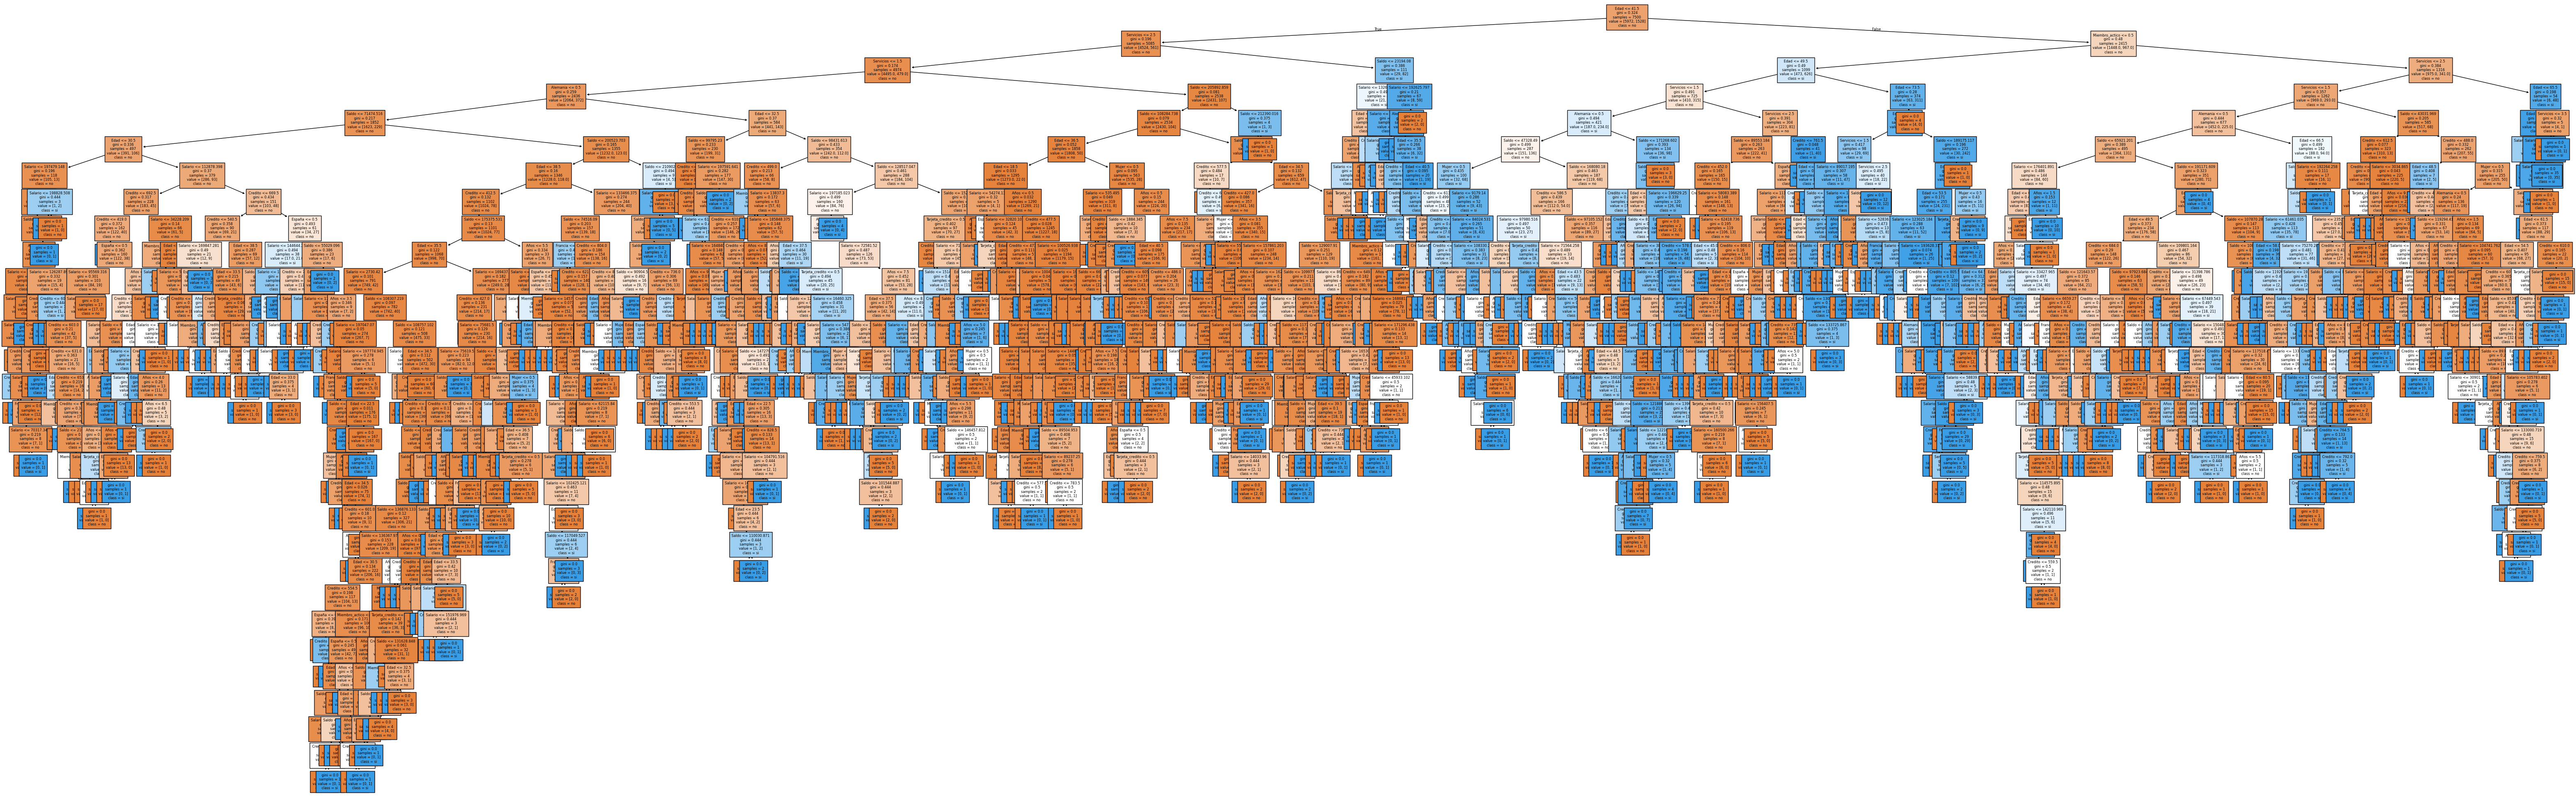

In [76]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=6,
          feature_names=valores_columnas);

In [77]:
modelo_arbol= DecisionTreeClassifier(max_depth=4, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [78]:
modelo_arbol.score(X_test,y_test)

0.8464

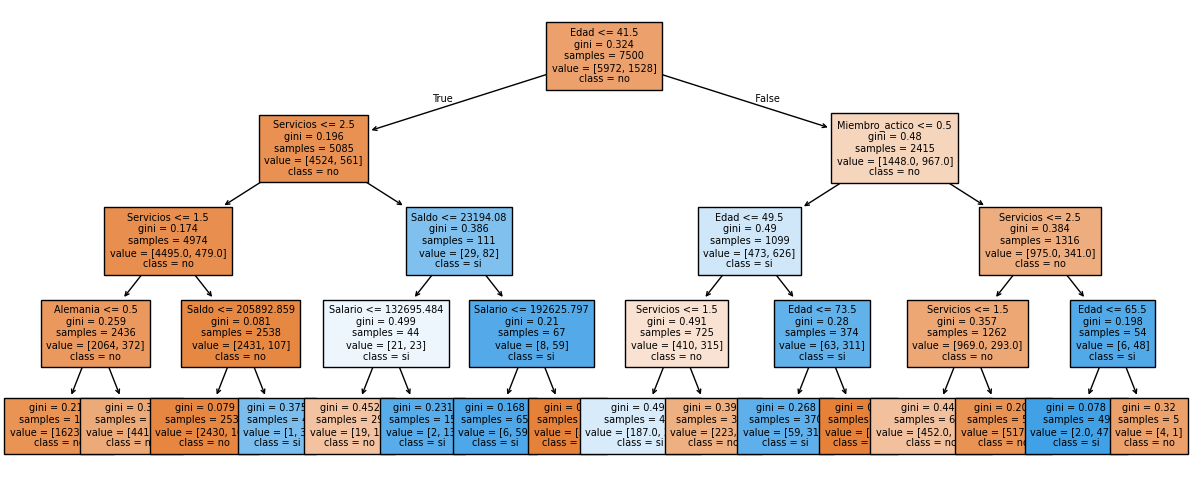

In [79]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no', 'si'],
          fontsize=7,
          feature_names=valores_columnas);

In [80]:
modelo_arbol.score(X_train,y_train)

0.8509333333333333

# Desafío 5: hora de la práctica

1. La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

In [81]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)

pd.DataFrame(X_train_normalizada)

0    1    2    3      4         5    6         7         8    9    10  \
0     0.0  0.0  1.0  1.0  0.796  0.216216  0.8  0.000000  0.333333  1.0  0.0   
1     0.0  0.0  1.0  0.0  0.612  0.256757  0.2  0.000000  0.333333  0.0  1.0   
2     1.0  0.0  0.0  1.0  0.634  0.256757  0.5  0.386645  0.666667  1.0  0.0   
3     0.0  0.0  1.0  1.0  0.514  0.040541  0.0  0.000000  0.333333  1.0  0.0   
4     0.0  1.0  0.0  1.0  0.374  0.270270  0.6  0.594774  0.000000  0.0  1.0   
...   ...  ...  ...  ...    ...       ...  ...       ...       ...  ...  ...   
7495  1.0  0.0  0.0  0.0  0.590  0.391892  0.9  0.637940  0.000000  1.0  0.0   
7496  0.0  1.0  0.0  1.0  0.676  0.229730  0.6  0.000000  0.000000  1.0  0.0   
7497  0.0  1.0  0.0  1.0  0.646  0.229730  0.6  0.000000  0.333333  1.0  0.0   
7498  0.0  0.0  1.0  1.0  0.720  0.202703  0.2  0.000000  0.333333  1.0  0.0   
7499  0.0  0.0  1.0  0.0  0.680  0.202703  0.5  0.000000  0.333333  1.0  0.0   

            11  
0     0.267600  
1     0.338919  
2     0.890516  
3     0.580365  
4     0.738898  
...        ...  
7495  0.609048  
7496  0.127054  
7497  0.492884  
7498  0.364454  
7499  0.689975  

[7500 rows x 12 columns]

2. Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_normalizada, y_train)

X_test_normalizado = normalizacion.transform(X_test)

knn.score(X_test_normalizado, y_test)

0.8172

3. Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimient

In [100]:
lista = [('dummy', dummy, X_test),('de árbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy: 0.7964
La exactitud del modelo de árbol: 0.8464
La exactitud del modelo knn: 0.8172


In [102]:
import pickle #exparta archivos binarios

with open('modelo_onehotencoder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)


In [103]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

4. Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

In [113]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [105]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')

modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [114]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([0])

Esto indica que la predicción fue el valor 0, que indica que no habrá churn. Por lo tanto, el cliente no dejará de utilizar los servicios.
